# Partie 1: Introduction sur les séries temporelles et Notions

#### Les Séries temporelles sont un domaine unique. C'est une science en soi. Les experts disent : 'Une bonne prévision est une bénédiction, tandis qu'une mauvaise prévision peut s'avérer dangereuse.


## <font color='#922B21'>I-Définitions </font>


Les données en série temporelle représentent les données d'une variable de réponse Y(t) observée à différents moments dans le temps t. Les données sur la variable sont collectées à des intervalles réguliers et dans un ordre chronologique. Tout ce qui est observé de manière séquentielle au fil du temps constitue une série temporelle.
 
Par exemple, les données collectées sur les ventes de smartphones à plusieurs intervalles de temps, le produit intérieur brut (PIB) d'une nation chaque année, la production d'électricité chaque année/mois, etc. sont tous des exemples de données en série temporelle.

L'objectif de la prévision des données en série temporelle est de comprendre comment la séquence d'observations va se poursuivre dans le futur.


la bibliothèque 'yfinance' est une bibliothèque Python qui permet aux utilisateurs de télécharger des données financières depuis Yahoo Finance*. Elle est couramment utilisée pour obtenir des informations sur les cours des actions, les indices, les devises, les matières premières, et d'autres instruments financiers.

*Yahoo finance :est un service en ligne qui offre des informations financières, des données sur les marchés boursiers, des actualités et d'autres ressources liées aux finance

In [1]:
!pip install yfinance

In [2]:
#importation de la bibliothèque yfinance
import yfinance as yf 

## <font color='#922B21'>II-Exemple de données </font>

In [3]:
import datetime

# Spécifiez le symbole boursier de l'entreprise et la plage de dates
symbol = "AAPL"
start_date = datetime.datetime(2022, 1, 1)
end_date = datetime.datetime(2023, 1, 1)

# Téléchargez les données depuis Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)


# Affiche les cinq premières lignes du jeu de données
print(data.head())

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.953888   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.669998   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.944000   
2022-01-06  172.699997  175.300003  171.639999  172.000000  170.056976   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.225052   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


### Comprendre les données: 

* **Date :** Les données ont été enregistrées le 3 janvier 2022.
* **Open :** Le cours d'ouverture de l'action était de 177.830002.
* **High :** Le cours le plus élevé atteint pendant la journée était de 182.880005.
* **Low :** Le cours le plus bas atteint pendant la journée était de 177.710007.
* **Close :** Le cours de clôture de l'action pour cette journée était de 182.009995.
* **Adj Close :** Le cours de clôture ajusté était de 179.953873.
* **Volume :** Le volume d'échanges pour cette journée était de 104487900 actions.


### Exemple de visualisation des données:tracage des données de la colonne "Close" 

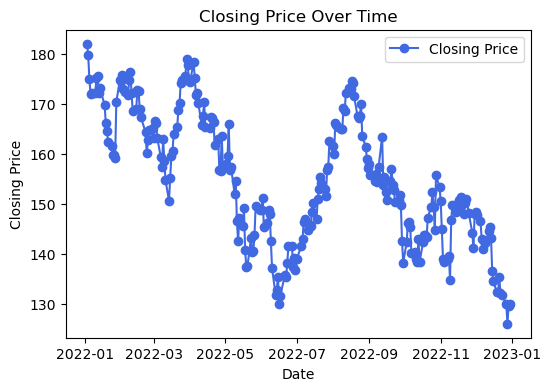

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.plot(data.index, data['Close'], label='Closing Price', marker='o', linestyle='-', color='royalblue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Price Over Time')
plt.legend()
plt.show()

## <font color='#922B21'>III-Composantes de la série temporelle </font>

Une série temporelle peut être composée de plusieurs éléments, dont voici les principaux :

<span style="color: #3498db; font-weight: bold;">Composante de Tendance (Tt) :</span> Représente la direction générale ou la trajectoire à long terme des données. Il peut s'agir d'une tendance linéaire ou non linéaire. Différentes méthodes de lissage peuvent être utilisées pour présenter cette composante, telles que la moyenne mobile. Cette méthode consiste à calculer la moyenne d'un certain nombre de points de données consécutifs, lissant ainsi les variations à court terme pour mettre en évidence les tendances plus générales.

<span style="color: #3498db; font-weight: bold;">Composante Saisonnière (St) :</span> Capture les variations régulières ou périodiques qui se produisent à des intervalles fixes, souvent associées aux saisons de l'année.

<span style="color: #3498db; font-weight: bold;">Composante Cyclique (Ct) :</span> Représente des variations qui se produisent à des intervalles irréguliers, généralement liées à des cycles économiques ou d'autres cycles de long terme.

<span style="color: #3498db; font-weight: bold;">Terme d'Erreur (εt) (aussi appelé bruit blanc) :</span> Représente la variabilité aléatoire ou le bruit qui ne peut pas être expliqué par les composantes précédentes. Si les données de la série temporelle ne comportent que le bruit blanc comme composante, elles ne peuvent pas être utilisées pour la prédiction.


## <font color='#922B21'>IV-Quelques types de décomposition  </font>

<span style="color: #3498db; font-weight: bold;">Décomposition additive de la série temporelle :</span> \($ Y_t = T_t + S_t + C_t + \varepsilon_t $\) La décomposition additive est la plus appropriée lorsque l'amplitude des fluctuations saisonnières, ou la variation autour de la tendance-cycle, ne varie pas en fonction du niveau de la série temporelle.

<span style="color: #3498db; font-weight: bold;">Décomposition multiplicative :</span> \($ Y_t = T_t \times S_t \times C_t \times \varepsilon_t $\) Lorsque la variation dans le schéma saisonnier, ou la variation autour de la tendance-cycle, semble être proportionnelle au niveau de la série temporelle, une décomposition multiplicative est plus appropriée. Les décompositions multiplicatives sont courantes avec les séries temporelles économiques.

Une alternative à l'utilisation d'une décomposition multiplicative est de d'abord transformer les données jusqu'à ce que la variation dans la série semble stable au fil du temps, puis d'utiliser une décomposition additive. Lorsqu'une transformation logarithmique est utilisée, cela équivaut à utiliser une décomposition multiplicative car \($ Y_t = T_t \times S_t \times C_t \times \varepsilon_t $\) est équivalent à \($ \log y_t = \log S_t + \log T_t + \log R_t $\).

### Décomposition saisonnière de la colonne Close 

La décomposition saisonnière repose sur la notion que les séries temporelles peuvent être décomposées en différentes composantes pour mieux comprendre les tendances, les variations saisonnières et les résidus.
Elle peut être effectuée à l'aide de méthodes, telles que la méthode de décomposition de X-12-ARIMA, la méthode STL (Seasonal and Trend decomposition using LOESS), ou simplement en utilisant la décomposition additive de statsmodels en Python.

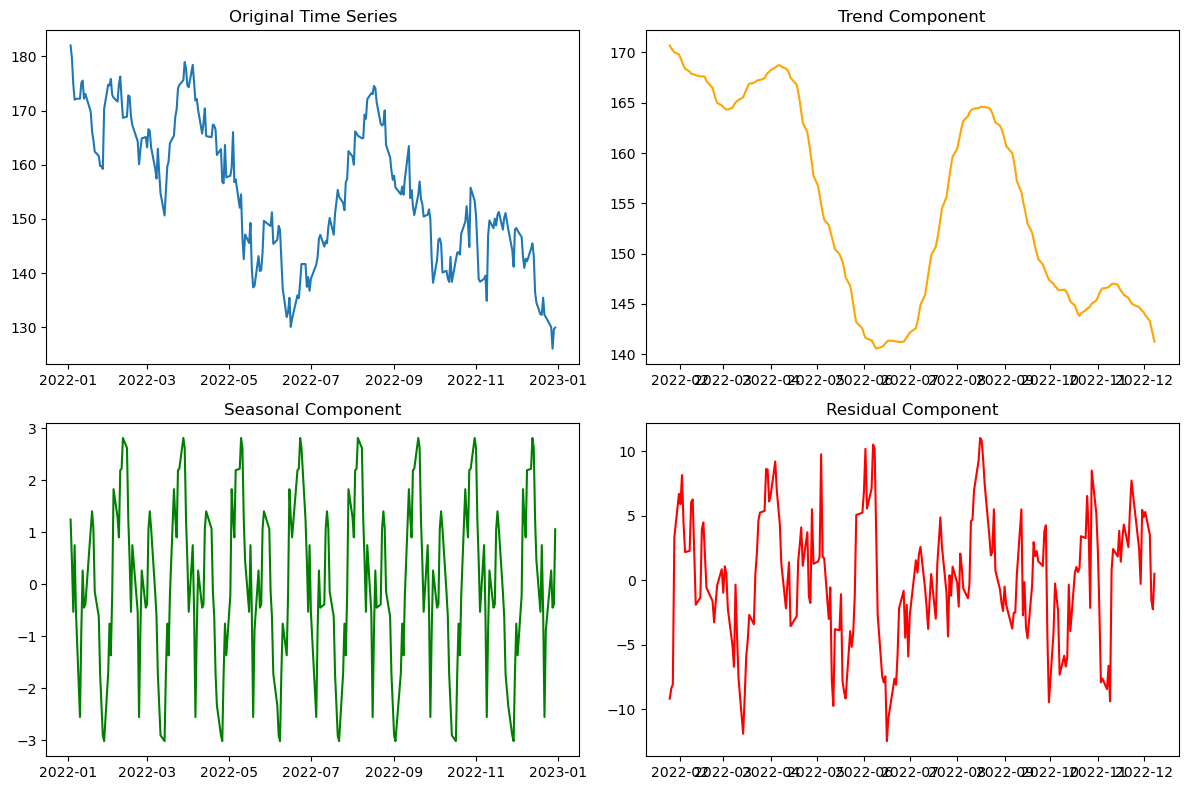

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
import pandas as pd #Used for data manipulation and analysis.

# on s'assure sue l'index est de type datetime
data.index = pd.to_datetime(data.index)

#  on applique la décomposition saisonnière
result = seasonal_decompose(data['Close'], model='additive', period=30)  # Période saisonnière (30 jours pour un mois)

# traçage des composantes
plt.figure(figsize=(12, 8))

# tracage de la série temporelle d'origine
plt.subplot(2, 2, 1)
plt.plot(data['Close'], label='Original')
plt.title('Original Time Series')

# Tracer la composante tendancielle
plt.subplot(2, 2, 2)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend Component')

# Tracer la composante saisonnière
plt.subplot(2, 2, 3)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal Component')

# Tracer la composante résiduelle
plt.subplot(2, 2, 4)
plt.plot(result.resid, label='Residual', color='red')
plt.title('Residual Component')

# Afficher le graphique
plt.tight_layout()
plt.show()

 ## <font color='#922B21'>V-Série stationnaire </font>

## <font color='  #d98880'>1)Définition </font>
Une série temporelle est dite stationnaire si elle possède les trois propriétés suivantes :

**- Moyenne constante**: c'est-à-dire que la moyenne reste constante au fil du temps.

**- Variance constante**: c'est-à-dire que la variance reste constante au fil du temps.

**- Covariance constante**: La valeur de la covariance entre deux périodes dépend du décalage entre ces deux périodes et non du moment où la covariance est calculée. Cela signifie que la covariance entre les séries au moment t=2 et t=4 devrait être approximativement la même que la covariance entre les séries au moment t=7 et t=9.


 ## <font color='  #d98880'>2)Importance de la stationnarité </font>
Travailler avec des séries stationnaires est essentiel pour plusieurs raisons lors de l'analyse de données de séries temporelles :

**-Modélisation plus facile** : Les séries stationnaires sont plus simples à modéliser et à prévoir. De nombreux modèles de séries temporelles supposent la stationnarité comme une hypothèse sous-jacente.

**-Interprétation significative** : Les données stationnaires permettent une interprétation plus significative des tendances, des motifs et des relations au sein des données.

**-Tests statistiques** : De nombreux tests et techniques statistiques reposent sur l'hypothèse de la stationnarité. Par exemple, les tests d'autocorrélation et de cointégration supposent la stationnarité.


## <font color='  #d98880'>3)Les défis des séries temporelles non stationnaires</font>

**-Trend**

**-saisonalité:** Tenir compte de la saisonnalité est essentiel pour réaliser des prévisions précises

**-heteroscèdasticité**


## <font color='  #d98880'>4)Comment rendre une série stationnaire </font>
La plupart des séries temporelles économiques présentent des tendances au fil du temps, souvent influencées par des facteurs tels que la croissance économique, l'inflation ou les changements démographiques. Cependant, pour appliquer efficacement diverses techniques de séries temporelles, il est important d'éliminer la tendance et de rendre la série stationnaire. Le détrending consiste à éliminer la composante de tendance pour se concentrer sur les variations sous-jacentes.

Le détrending peut être réalisé à l'aide de techniques telles que :

**-Différenciation** :Le processus de différentiation consiste à calculer les différences entre les valeurs successives de la série temporelle. 

**-Décomposition** : Cette technique consiste à décomposer la série temporelle en composantes telles que la tendance, la     saisonnalité et le résidu afin de les analyser séparément.

**-Régression** : Modéliser la tendance par régression puis examiner les résidus.




## <font color='  #d98880'>5) Vérification de Statinnarité</font>

L'utilisation de plusieurs tests de stationnarité  fournit une meilleure compréhension des propriétés de la série.

**-Outil Graphique: la fonction d'autocorrélation(ACF):**
Une manière de vérifier la stationnarité consiste à analyser la fonction d'autocorrélation (ACF) des données de la série temporelle. L'ACF mesure la corrélation entre un point de données et ses valeurs décalées dans le temps. Dans une série stationnaire, les valeurs de l'ACF devraient décroître rapidement, ce qui indique qu'il y a peu de corrélation entre les observations à différents décalages temporels.

la zone bleue dans les graphiques ACF représente l'intervalle de confiance à 95 % et sert d'indicateur pour le seuil de signification. Cela signifie que tout ce qui se trouve dans la zone bleue est statistiquement proche de zéro et tout ce qui se trouve à l'extérieur de la zone bleue est statistiquement différent de zéro.

**-Outils statistiques**: les tests statistiques sont utiliser pour tester formellement pour la stationnarité.Les deux tests poulaires sont ADF et KPSS. Ces deux tests sont utilisés souvent ensemble pour obtenir une évaluation plus robuste et une vision plus complète de la nature de la série temporelle 

#### a) Test d'Augmented Dickey Fuller (ADF) :

Ce test statistique appartient à la catégorie appelée test de racine unitaire. Il vérifie si la série temporelle a une racine unitaire et est donc non stationnaire. Lorsque nous effectuons ce test pour vérifier la stationnarité, nous vérifions la présence d'une racine unitaire.

Hypothèse nulle H0 : Il y a une racine unitaire, c'est-à-dire que la série temporelle est non stationnaire.

Hypothèse alternative Ha : Il n'y a pas de racine unitaire, c'est-à-dire que la série temporelle est stationnaire."



Que signifie la racine unitaire ?

Il existe deux types de séries temporelles stochastiques non stationnaires observées :

##### * Modèle de Random Walk sans dérive (drift)


Dans le modèle de Random Walk sans dérive, la moyenne de la série est constante , mais la variance augmente avec le temps. Ainsi, la série est non stationnaire. 

Par conséquent, la prévision pour ce modèle est la dernière observation, car les mouvements futurs sont imprévisibles et aussi susceptibles d'aller à la hausse qu'à la baisse.

La valeur de la série temporelle Y au temps t est égale à sa valeur au temps t-1 plus un choc aléatoire, c'est-à-dire $Y(t) = Y(t-1) + Erreur u(t)$.

La première différence du Random Walk sans dérive est une série temporelle stationnaire. Pourquoi ? Parce que, de l'équation ci-dessus, Y(t) — Y(t-1) = Terme d'erreur u(t). Le terme d'erreur est un bruit blanc ou une série stationnaire avec une moyenne de 0 et une variance constante.

***Modèle de Random Walk avec dérive (drift)**

Dans le Random Walk avec dérive, à la fois la moyenne de la série et la variance augmentent avec le temps. Ainsi, la série n'est pas stationnaire. Ici, la valeur de la série temporelle au temps $t$ est égale à sa valeur au temps $(t-1)$ plus un paramètre de dérive alpha plus un choc aléatoire, c'est-à-dire $Y(t) = Y(t-1) + alpha + u(t)$. Le paramètre de dérive $alpha$ représente l'augmentation moyenne de la série d'une période à l'autre.

<span style="color:red; font-size:16px">Un modèle de Random Walk est appelé processus de racine unitaire.
 </span>

Il est écrit comme suit : $Y(t) = (Delta)* Y(t-1) + u(t)$

##### Si la valeur de $Delta$ est $=1$ (Random Walk) ou  $>1$ (Random Walk avec dérive), la série n'est pas stationnaire. 
##### Si la valeur de $Delta$ est $<1$, nous concluons que la série est stationnaire.



#### b)Test de Kwiatkowski-Phillips-Schmidt-Shin (test KPSS) :

Ici, les hypothèses nulle et alternative sont opposées au test ADF.

Hypothèse nulle : Le processus est stationnaire par tendance.

Hypothèse alternative : La série a une racine unitaire (la série n'est pas stationnaire autour d'une tendance déterministe).

Si nous utilisons les deux tests pour confirmer la stationnarité, l'une des quatre situations suivantes est possible :

* $Scénario I$ —  Les deux tests concluent à la stationnarité. Par conséquent, la série est stationnaire.


* $Scénario II$ — Les deux tests concluent à la non-stationnarité. Par conséquent, la série n'est pas stationnaire.


* $ Scénario III$ — Le test ADF conclut à la stationnarité mais le test KPSS conclut à la non-stationnarité. 

**=>** Cela indique qu'il est nécessaire d'utiliser **la différenciation** pour rendre la série stationnaire. Ici, une nouvelle série est créée où la valeur de l'observation au temps $ t$ est donnée par la différence entre la valeur réelle au temps $ t$ et la valeur au temps $t-1$. Ainsi,

$    \text{Valeur}(t) \text{ de la série différenciée} = \text{observation}(t) - \text{observation}(t-1) $


* $Scénario IV$  — Le test ADF conclut à la non-stationnarité mais le test KPSS confirme la stationnarité. 

**=>** Cela indique qu'il est nécessaire d'utiliser $la détendance$ pour rendre la série stationnaire. Les méthodes courantes de détendance comprennent l'utilisation de **la transformation logarithmique**, **la transformation de la racine carrée de la série originale**, etc

**Remarque:**

**-** L'application des logarithmes avant la différenciation est souvent utilisée lorsque les données présentent une croissance exponentielle ou une variabilité non constante au fil du temps.

**-** Après avoir calculé les premières différences, on vérifie si la nouvelle série ainsi obtenue est stationnaire.Sinon on procède la différentiation jusqu'à obtenir la série stationnaire désirée


## <font color='  #d98880'>6)Exemle d'une série stationnaire: Bruit Blanc  </font>

En raison de sa stationnarité inhérente, il n'a pas de schéma prévisible à long terme. il est donc sans mémoire.


Text(0.5, 1.0, 'Distribution of White Noise')

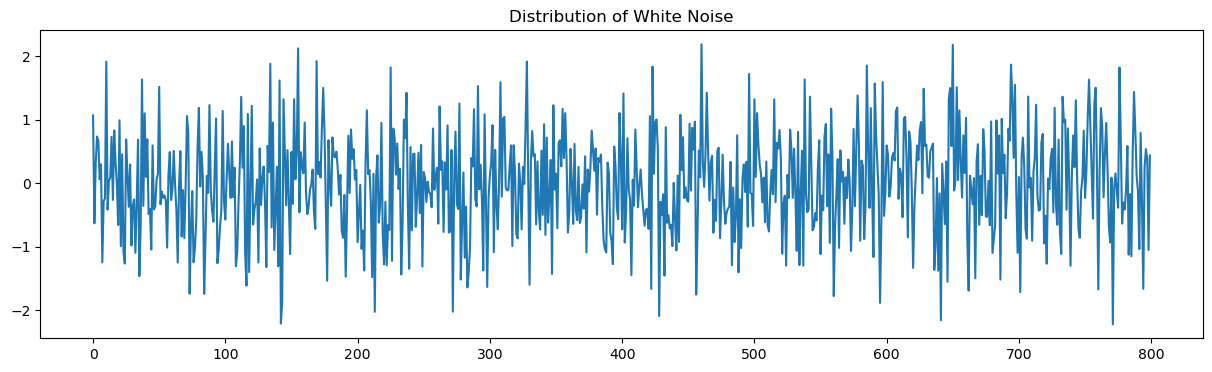

In [4]:
# Plot for White Noise with Mean 0 and standard deviation as 0.8
import numpy as np
import matplotlib.pyplot as plt
wnoise= np.random.normal(loc=0, scale=0.8, size=800)
plt.figure(figsize=(15, 4)),
plt.plot(wnoise);
plt.title('Distribution of White Noise')

On remarque quela distribution est constante autour de la moyenne et est totalement aléatoire. Il est difficile de prédire le prochain mouvement de la série temporelle. Si nous représentons l'autocorrélation de cette série, on observera une autocorrélation complètement nulle. Cela signifie que la corrélation entre la série à n'importe quel moment t et ses valeurs retardées est nulle.

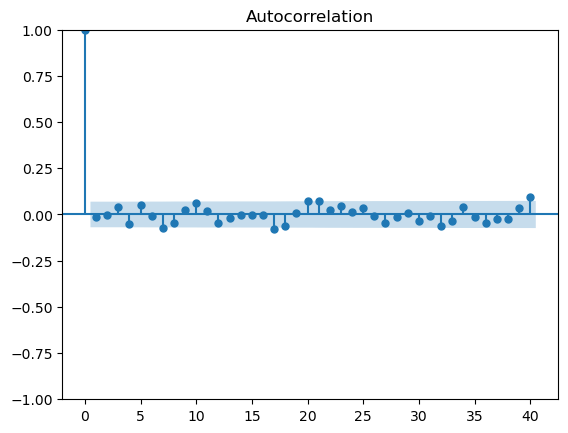

In [14]:
import statsmodels.api as sm
acr=sm.graphics.tsa.plot_acf(wnoise, lags=40)

On remarques que tous les décalages se trouvent à l'intérieur de la zone surlignée en bleu. Cela indique qu'il y a presque aucune corrélation entre les observations à différents décalages. Si un ou plusieurs pics se trouvent en dehors de cette plage, ou si plus de 5 % des pics se situent en dehors de ces plages, alors nous pouvons conclure que la série n'est pas un 'Bruit Blanc'

# webographies 

https://medium.com/@evertongomede/forecasting-non-stationary-time-series-03b638a7cd50

https://towardsdatascience.com/introduction-to-time-series-forecasting-part-2-arima-models-9f47bf0f476b

https://towardsdatascience.com/introduction-to-time-series-forecasting-part-1-average-and-smoothing-models-a739d832315

https://medium.com/@JDEconomics/how-to-test-for-stationarity-in-time-series-data-using-python-44d82890aa9d